# Prediction

## Generate 40 batches of data in ndarray

### Input: batch_size             Output: x_test, cropped_y

In [1]:
from tf_unet import unet, image_util, util
from matplotlib import pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
batch_size = 40
image, mask = unet.get_image_mask()
x_test_op, y_test_op = unet.batch_op(image, mask, batch_size, shuffle=False)
with tf.Session() as sess:
    init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
    sess.run(init_op)
    # Coordinate the loading of image files.
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    x_test, y_test = sess.run([x_test_op, y_test_op])
    coord.request_stop()

In [1]:
np.save('x_test.npy',x_test)
np.save('y_test.npy',y_test)

NameError: name 'np' is not defined

# Load Test Set

In [2]:
from tf_unet import unet, image_util, util
from matplotlib import pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

## Seperate Prediction to prevent OOM

In [3]:
'''test set should have 40 images, predict 4 one time'''
for i in range(10):
    left = 4*i
    right = 4*(i+1)
    x_batch = x_test[left:right,:,:,:]
    net = unet.Unet(channels=3, n_class=3,layers=3, features_root=64,norm=True,cost_kwargs=dict(class_weights=[2.90, 0.36, 0.0111]))
    prediction = net.predict('4.9_3L/model.cpkt',x_batch)
    if i == 0:
        pred = np.argmax(prediction,3)
    else:
        pred = np.concatenate((pred,np.argmax(prediction,3)), axis=0)
cropped_y = util.crop_to_shape(y_test, prediction.shape)
label = np.argmax(cropped_y, axis=3)
print(pred.shape, label.shape)    


2018-04-11 11:15:47,001 Layers 3, features 64, filter size 3x3, pool size: 2x2


Instructions for updating:
keep_dims is deprecated, use keepdims instead


2018-04-11 11:15:48,765 From /home/simon/deeplearning/models/UNET/tf_unet/layers.py:69: calling reduce_sum (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


INFO:tensorflow:Restoring parameters from 4.9_3L/model.cpkt


2018-04-11 11:15:49,185 Restoring parameters from 4.9_3L/model.cpkt
2018-04-11 11:15:49,409 Model restored from file: 4.9_3L/model.cpkt
2018-04-11 11:15:52,817 Layers 3, features 64, filter size 3x3, pool size: 2x2


INFO:tensorflow:Restoring parameters from 4.9_3L/model.cpkt


2018-04-11 11:15:53,594 Restoring parameters from 4.9_3L/model.cpkt
2018-04-11 11:15:53,671 Model restored from file: 4.9_3L/model.cpkt
2018-04-11 11:15:54,621 Layers 3, features 64, filter size 3x3, pool size: 2x2


INFO:tensorflow:Restoring parameters from 4.9_3L/model.cpkt


2018-04-11 11:15:55,424 Restoring parameters from 4.9_3L/model.cpkt
2018-04-11 11:15:55,502 Model restored from file: 4.9_3L/model.cpkt
2018-04-11 11:15:56,495 Layers 3, features 64, filter size 3x3, pool size: 2x2


INFO:tensorflow:Restoring parameters from 4.9_3L/model.cpkt


2018-04-11 11:15:57,390 Restoring parameters from 4.9_3L/model.cpkt
2018-04-11 11:15:57,464 Model restored from file: 4.9_3L/model.cpkt
2018-04-11 11:15:58,445 Layers 3, features 64, filter size 3x3, pool size: 2x2


INFO:tensorflow:Restoring parameters from 4.9_3L/model.cpkt


2018-04-11 11:15:59,277 Restoring parameters from 4.9_3L/model.cpkt
2018-04-11 11:15:59,359 Model restored from file: 4.9_3L/model.cpkt
2018-04-11 11:16:00,362 Layers 3, features 64, filter size 3x3, pool size: 2x2


INFO:tensorflow:Restoring parameters from 4.9_3L/model.cpkt


2018-04-11 11:16:01,196 Restoring parameters from 4.9_3L/model.cpkt
2018-04-11 11:16:01,280 Model restored from file: 4.9_3L/model.cpkt
2018-04-11 11:16:02,281 Layers 3, features 64, filter size 3x3, pool size: 2x2


INFO:tensorflow:Restoring parameters from 4.9_3L/model.cpkt


2018-04-11 11:16:03,127 Restoring parameters from 4.9_3L/model.cpkt
2018-04-11 11:16:03,207 Model restored from file: 4.9_3L/model.cpkt
2018-04-11 11:16:04,209 Layers 3, features 64, filter size 3x3, pool size: 2x2


INFO:tensorflow:Restoring parameters from 4.9_3L/model.cpkt


2018-04-11 11:16:05,051 Restoring parameters from 4.9_3L/model.cpkt
2018-04-11 11:16:05,131 Model restored from file: 4.9_3L/model.cpkt
2018-04-11 11:16:06,142 Layers 3, features 64, filter size 3x3, pool size: 2x2


INFO:tensorflow:Restoring parameters from 4.9_3L/model.cpkt


2018-04-11 11:16:06,981 Restoring parameters from 4.9_3L/model.cpkt
2018-04-11 11:16:07,064 Model restored from file: 4.9_3L/model.cpkt
2018-04-11 11:16:08,077 Layers 3, features 64, filter size 3x3, pool size: 2x2


INFO:tensorflow:Restoring parameters from 4.9_3L/model.cpkt


2018-04-11 11:16:08,918 Restoring parameters from 4.9_3L/model.cpkt
2018-04-11 11:16:09,001 Model restored from file: 4.9_3L/model.cpkt


(40, 560, 760) (40, 560, 760)


# Analyzing Accuracy, Recall, IOU

In [4]:
'''Overall Accuracy'''
accuracy = np.mean(np.equal(label, pred))
print('Accuracy:',accuracy)
'''Calculate IOU for buckle, band'''
correct_pred = pred[pred==label]
corrected_predicted_buckle = np.sum(correct_pred==0)
corrected_predicted_band = np.sum(correct_pred==1)
predicted_buckle = np.sum(pred==0)
predicted_band = np.sum(pred==1)
buckle_IOU = corrected_predicted_buckle / predicted_buckle
band_IOU = corrected_predicted_band / predicted_band
print('buckle_IOU:',buckle_IOU)
print('band_IOU:',band_IOU)

'''Calculate Recall for buckle, band'''
all_buckle = np.sum(label==0)
all_band = np.sum(label==1)
buckle_recall = corrected_predicted_buckle / all_buckle
band_recall = corrected_predicted_band / all_band
print('buckle recall:', buckle_recall)
print('band recall', band_recall)


Accuracy: 0.859922109962406
buckle_IOU: 0.3966125564069172
band_IOU: 0.14623150518192124
buckle recall: 0.6392146334915618
band recall 0.6675463240401197


# Plot Prediction 

## Input: choose a test_ind to predict

2018-04-11 11:18:22,695 Layers 3, features 64, filter size 3x3, pool size: 2x2


INFO:tensorflow:Restoring parameters from 4.9_3L/model.cpkt


2018-04-11 11:18:23,582 Restoring parameters from 4.9_3L/model.cpkt
2018-04-11 11:18:23,669 Model restored from file: 4.9_3L/model.cpkt


(1, 560, 760, 3)


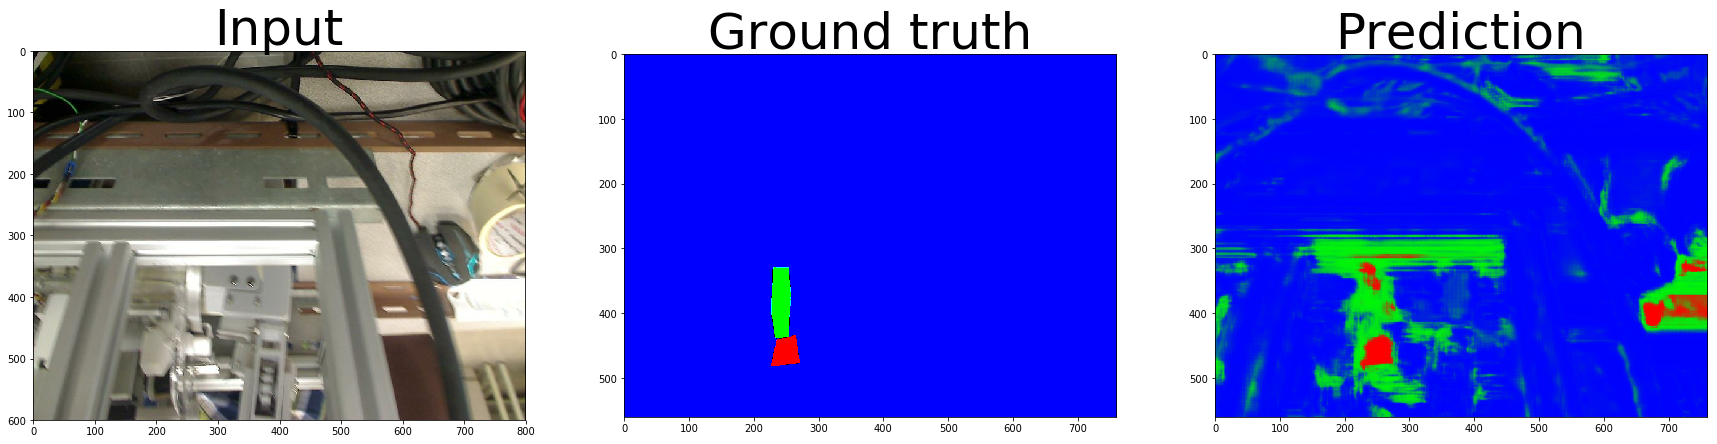

In [8]:
test_ind = 2
x_show = x_test[test_ind,:,:,:]
x_feed = np.reshape(x_show,(1,600,800,3))
y_show = cropped_y[test_ind,:,:,:]
net = unet.Unet(channels=3, n_class=3,layers=3, features_root=64,norm=True,cost_kwargs=dict(class_weights=[2.90, 0.36, 0.0111]))
prediction = net.predict('4.9_3L/model.cpkt',x_feed)
fig, ax = plt.subplots(1,3,figsize=(30,40))
ax[0].imshow(x_show)
ax[1].imshow(y_show)
ax[2].imshow(prediction[0,:,:,:])
ax[0].set_title("Input",{'fontsize':50})
ax[1].set_title("Ground truth",{'fontsize':50})
ax[2].set_title("Prediction",{'fontsize':50})
print(prediction.shape)

# Read Image Data Pipeline

# Calculate Class Distributions 

In [1]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe
#tfe.enable_eager_execution()
from tf_unet import unet, image_util, util
import numpy as np
import cv2
import os
print(os.getcwd())

filenames = tf.train.match_filenames_once('/home/simon/deeplearning/models/UNET/image/*.jpg')
filename_queue = tf.train.string_input_producer(filenames, shuffle = False)
reader = tf.WholeFileReader()
key, value = reader.read(filename_queue)
imagesq = tf.image.decode_jpeg(value,channels=3)
imagesq.set_shape((600, 800, 3))


mask_filenames = tf.train.match_filenames_once('/home/simon/deeplearning/models/UNET/mask/*.jpg')
mask_filename_queue = tf.train.string_input_producer(mask_filenames,shuffle = False)
reader = tf.WholeFileReader()
key, value = reader.read(mask_filename_queue)
labelsq = tf.image.decode_jpeg(value,channels=3)
labelsq.set_shape((600, 800, 3))



/home/simon/deeplearning/models/UNETv1


(1, 600, 800, 3)
INFO:tensorflow:Error reported to Coordinator: <class 'tensorflow.python.framework.errors_impl.CancelledError'>, Enqueue operation was cancelled
	 [[Node: input_producer/input_producer_EnqueueMany = QueueEnqueueManyV2[Tcomponents=[DT_STRING], timeout_ms=-1, _device="/job:localhost/replica:0/task:0/device:CPU:0"](input_producer, input_producer/Identity)]]


2018-04-05 16:31:57,748 Error reported to Coordinator: <class 'tensorflow.python.framework.errors_impl.CancelledError'>, Enqueue operation was cancelled
	 [[Node: input_producer/input_producer_EnqueueMany = QueueEnqueueManyV2[Tcomponents=[DT_STRING], timeout_ms=-1, _device="/job:localhost/replica:0/task:0/device:CPU:0"](input_producer, input_producer/Identity)]]


0.003427083333333333 0.21146666666666666 0.7849083333333333


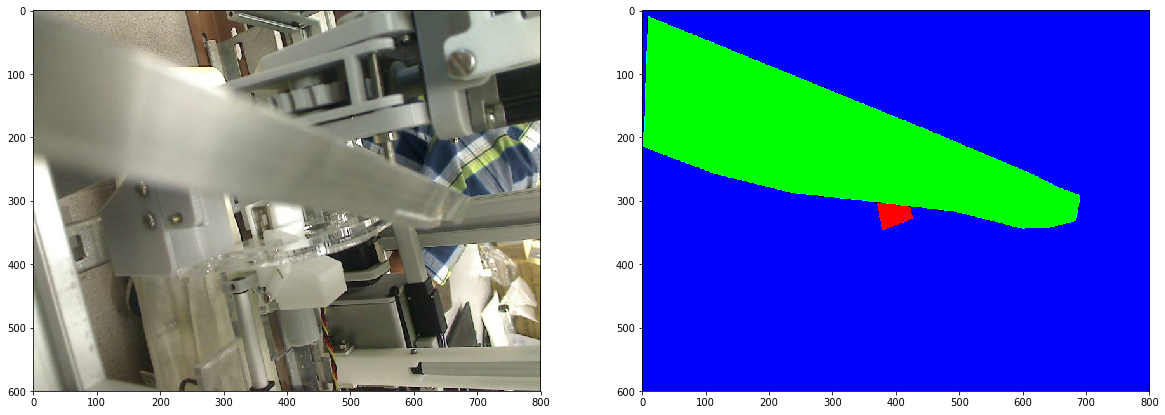

In [4]:
batch_size = 1
# Generate batch
num_preprocess_threads = 1
min_queue_examples = 256
images,labels = tf.train.shuffle_batch(
        [imagesq,labelsq],
        batch_size=batch_size,
        num_threads=num_preprocess_threads,
        capacity=min_queue_examples + 3 * batch_size,
        min_after_dequeue=min_queue_examples) 
zero = tf.zeros((batch_size,600,800,3))
one = tf.ones((batch_size,600,800,3))
labels = tf.where(labels>128, one, zero)
with tf.Session() as sess:
    # Required to get the filename matching to run.
    init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
    sess.run(init_op)
    # Coordinate the loading of image files.
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    # Get an image tensor and print its value.
    image, labels = sess.run([images,labels])
    print(labels.shape)
'''Calculate Class Distributions'''
num_c0 = np.sum(np.equal(labels[:,:,:,0],1))
num_c1 = np.sum(np.equal(labels[:,:,:,1],1))
num_c2 = np.sum(np.equal(labels[:,:,:,2],1))
num = labels.shape[0] * labels.shape[1] * labels.shape[2]
ratio_c0 = num_c0 / num
ratio_c1 = num_c1 / num
ratio_c2 = num_c2 / num
print(ratio_c0, ratio_c1, ratio_c2)
    #0.003293362831858407 0.032027535029498524 0.9645724649705014
    #0.0036054848820058997 0.02971028761061947 0.9665813698377581
    #0.0036786780973451327 0.02997737831858407 0.9662445151179941
    #0.003494220132743363 0.031215486725663717 0.9651865781710914
    #0.0034182798672566374 0.028495731932153393 0.9679831674041298
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1,2,figsize=(20,30))
ax[0].imshow(image[0,:,:,:])
ax[1].imshow(labels[0,:,:,:])